In [ ]:
import numpy as np

def rotacao_xy_180graus (angulos):
  'Calcula o TR de 0° até 180° de uma rotação apenas no plano xy'
  z_linha = np.array([90, 90, 0])
  for count, alpha in enumerate(angulos):
    if 0 <= alpha <= 90:
      x_linha = np.array([alpha, 90 - alpha, 90])
      y_linha = np.array([90 + alpha, alpha, 90])
    elif 90 < alpha <= 180:
      x_linha = np.array([alpha, alpha - 90, 90])
      Y_linha = np.array([alpha + 90, alpha, 90])
    else:
      raise ValueError('O ângulo deve estar entre 0 e 180 graus')
    print(f'*TR{count+1}  0 0 0  {x_linha[0]} {x_linha[1]} {x_linha[2]}  {y_linha[0]} {y_linha[1]} {y_linha[2]}  {z_linha[0]} {z_linha[1]} {z_linha[2]}')

def divergente(theta):
  x = 4
  theta = np.deg2rad(theta)
  print(f'Altura: ± {x*np.tan(theta)} cm\n\n\n')
  omega = 2*np.pi*(1-np.cos(theta))
  Fg = omega/(4*np.pi)
  print(f'SI1  -1.  {np.cos(theta)}  1.')
  print(f'SP1  0  {1 - Fg}  {Fg}')
  print(f'SB1  0  0  1')

In [ ]:
rotacao_xy_180graus([0, 15, 80, 54, 43])

*TR1  0 0 0  0 90 90  90 0 90  90 90 0
*TR2  0 0 0  15 75 90  105 15 90  90 90 0
*TR3  0 0 0  80 10 90  170 80 90  90 90 0
*TR4  0 0 0  54 36 90  144 54 90  90 90 0
*TR5  0 0 0  43 47 90  133 43 90  90 90 0


In [ ]:
divergente(36)

Altura: ± 2.9061701120214436 cm



SI1  -1.  0.8090169943749475  1.
SP1  0  0.9045084971874737  0.09549150281252627
SB1  0  0  1


In [ ]:
import os
import numpy as np

def calcula_energias(angulos):
  dados_energia = {}
  energia = 0.662
  mc_2 = 0.511
  cte = energia/mc_2
  angulos = np.deg2rad(angulos)
  for count, alpha in enumerate(angulos):
    energia/(1 + (cte*(1-np.cos(alpha))))
    energia_linha = energia/(1 + (cte*(1-np.cos(alpha))))
    dados_energia[count + 1] = [round(float(energia_linha - 0.01), 3), round(float(energia_linha), 3), round(float(energia_linha + 0.01), 3)]
  return(dados_energia)

caminhos_colimado = [
    '/content/drive/MyDrive/resultados mcnp/compton/Colimado/resultados_vyk_1.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Colimado/resultados_vyk_2.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Colimado/resultados_vyk_3.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Colimado/resultados_vyk_4.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Colimado/resultados_vyk_5.o',
]
caminhos_divergente = [
    '/content/drive/MyDrive/resultados mcnp/compton/Divergente/resultados_vyk_1.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Divergente/resultados_vyk_2.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Divergente/resultados_vyk_3.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Divergente/resultados_vyk_4.o',
    '/content/drive/MyDrive/resultados mcnp/compton/Divergente/resultados_vyk_5.o',
]

angulos_interesse = [0, 15, 80, 54, 43]

def ler_dados (inicio, fim, caminhos, angulos):
  infos = {}
  dados_energia = calcula_energias(angulos)
  for contador, arquivo in enumerate(caminhos):
    with open(arquivo, 'r') as file:
      lines = file.readlines()
      linhas_do_intervalo = lines[inicio - 1: fim]
      detectado = []
      energias = []
      for linha in linhas_do_intervalo:
        partes = linha.split()
        energia = float(partes[0])
        if dados_energia[contador + 1][0] <= energia <= dados_energia[contador + 1][2]:
          detectado.append([float(partes[1]), float(partes[2])])
          energias.append(energia)
      detecado_array = np.array(detectado)
      primeira_coluna = detecado_array[:, 0]
      indice_do_maximo = primeira_coluna.argmax()
      infos[float(energias[indice_do_maximo])] = [float(detecado_array[indice_do_maximo][0]), float(detecado_array[indice_do_maximo][1])]
  return (infos)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
calcula_energias(angulos_interesse)
ler_dados(224, 1024, caminhos_colimado, angulos_interesse)

{1: [0.652, 0.662, 0.672], 2: [0.624, 0.634, 0.644], 3: [0.31, 0.32, 0.33], 4: [0.422, 0.432, 0.442], 5: [0.481, 0.491, 0.501]}


{0.662: [0.191042, 0.0002],
 0.634: [0.00071889, 0.0037],
 0.316: [5.746e-05, 0.0132],
 0.436: [5.039e-05, 0.0141],
 0.498: [5.441e-05, 0.0136]}

In [ ]:
calcula_energias(angulos_interesse)
ler_dados(227, 1027, caminhos_divergente, angulos_interesse)

{1: [0.652, 0.662, 0.672], 2: [0.624, 0.634, 0.644], 3: [0.31, 0.32, 0.33], 4: [0.422, 0.432, 0.442], 5: [0.481, 0.491, 0.501]}


{0.662: [0.00134834, 0.0008],
 0.634: [9.14427e-06, 0.0102],
 0.314: [2.89435e-06, 0.0182],
 0.44: [8.39848e-06, 0.0107],
 0.481: [5.53851e-06, 0.0131]}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def grafico_polar(inicio, fim, caminhos, angulos):
  energia = 0.662
  mc_2 = 0.511
  cte = energia/mc_2
  theta = np.linspace(0, 2*np.pi, 360)
  energia_linha = energia/(1 + (cte*(1-np.cos(theta))))
  experimental = ler_dados(inicio, fim, caminhos, angulos)
  angulos = np.deg2rad(angulos)
  fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': 'polar'})
  ax.scatter(
      angulos,
      experimental.keys(),
      label='Pontos Experimentais',
      color='blue',
      marker='o',
      s=10,
      zorder=4
    )
  ax.plot(
      theta,
      energia_linha,
      label='Curva Teórica (Compton)',
      color='red',
      linestyle='-',
      zorder=2
    )
  titulo = 'Energia Pós-Dispersão vs. Ângulo de Dispersão (Efeito Compton - Divergente)'
  if inicio == 224:
    titulo = 'Energia Pós-Dispersão vs. Ângulo de Dispersão (Efeito Compton - Colimado)'
  ax.set_title(titulo, va='top', y=1.1)
  ax.legend(loc='lower left', bbox_to_anchor=(1.05, 0.0))
  ax.grid(True)
  plt.show()

def grafico_cartesiano(inicio, fim, caminhos, angulos):
  energia = 0.662
  mc_2 = 0.511
  cte = energia/mc_2
  theta = np.linspace(0, 2*np.pi, 360)
  energia_linha = energia/(1 + (cte*(1-np.cos(theta))))
  experimental = ler_dados(inicio, fim, caminhos, angulos)
  angulos = np.deg2rad(angulos)
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.scatter(
      angulos,
      experimental.keys(),
      label='Pontos Experimentais',
      color='blue',
      marker='o',
      s=10,
      zorder=4
    )
  ax.plot(
      theta,
      energia_linha,
      label='Curva Teórica (Compton)',
      color='red',
      linestyle='-',
      linewidth=2,
      zorder=2
    )
  titulo = 'Energia Pós-Dispersão vs. Ângulo de Dispersão (Efeito Compton - Divergente)'
  if inicio == 224:
    titulo = 'Energia Pós-Dispersão vs. Ângulo de Dispersão (Efeito Compton - Colimado)'
  ax.set_title(titulo, va='bottom', y=1.1)
  ax.set_xlabel("Ângulo de Dispersão (radianos)", fontsize=12)
  ax.set_ylabel("Energia Pós-Dispersão (MeV)", fontsize=12)
  ax.legend(loc='lower right')
  ax.grid(True)
  plt.tight_layout()
  plt.show()

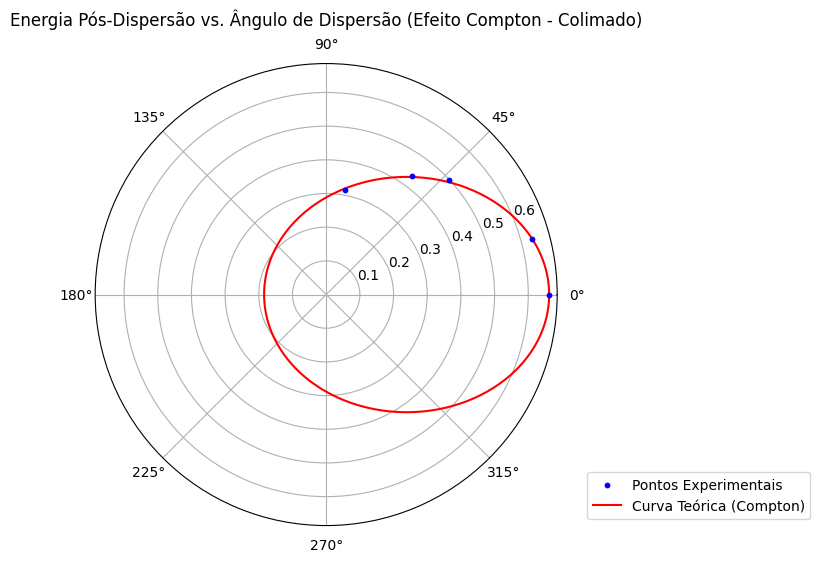

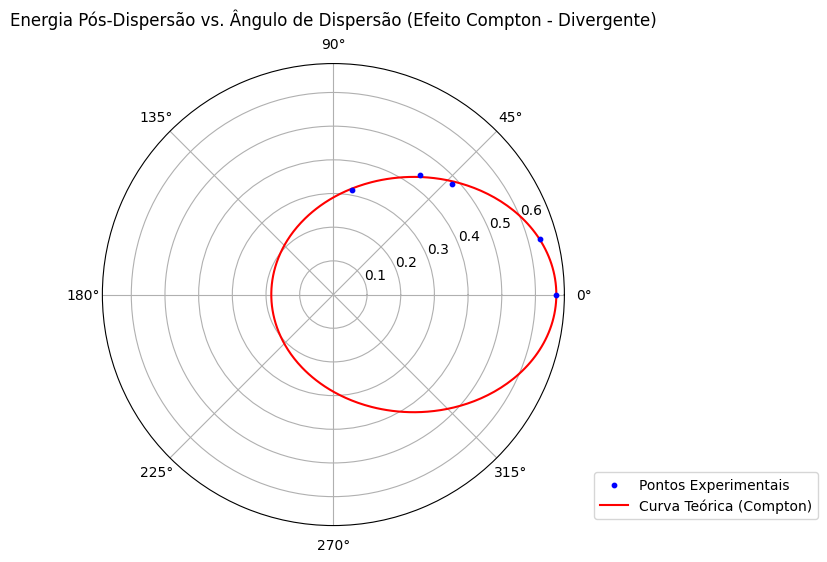

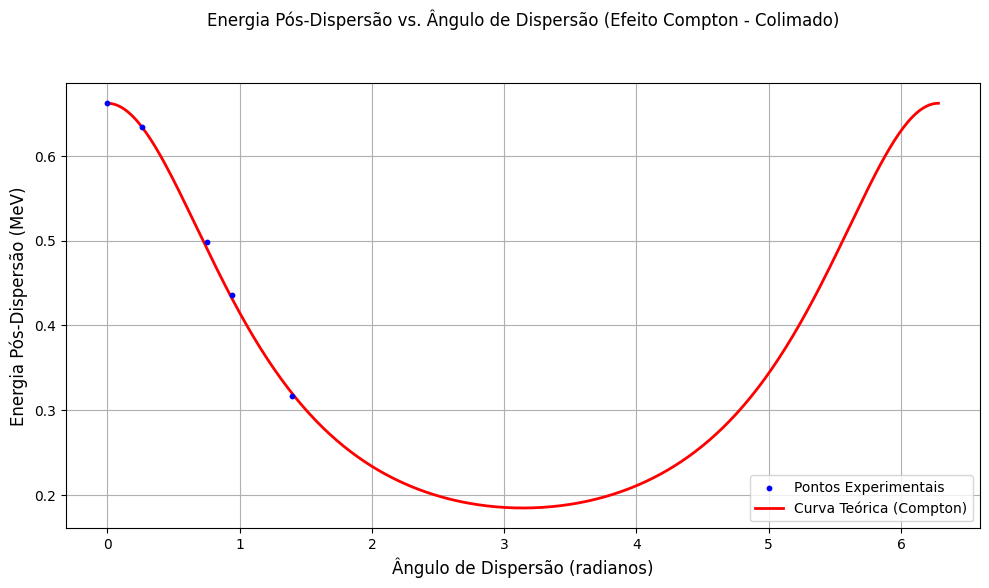

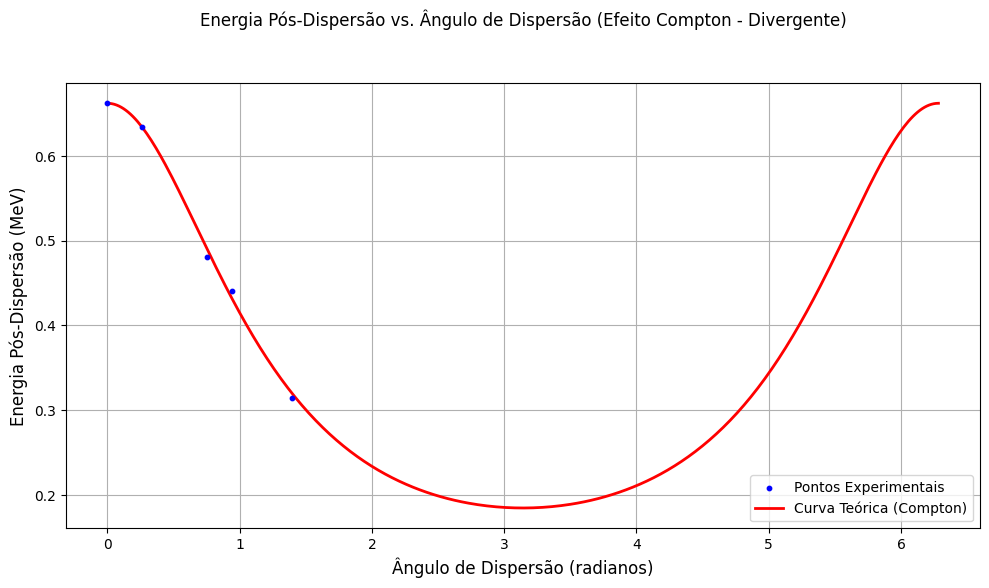

In [ ]:
grafico_polar(224, 1024, caminhos_colimado, angulos_interesse)
grafico_polar(227, 1027, caminhos_divergente, angulos_interesse)
grafico_cartesiano(224, 1024, caminhos_colimado, angulos_interesse)
grafico_cartesiano(227, 1027, caminhos_divergente, angulos_interesse)